Exploratory analysis and Preprocessing of data.


In [1]:
import os

base_dir = '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/'

files = os.listdir(base_dir)
print(files[:10])
print(len(files))

['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bar', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet']
67


In this notebook we will preprocess the data and do the emploratory analysis. As u see in above cell we read the folders also can be interpreted as classes from the dataset we have 67 classes as of now. Our dataset contains 2 text files mentioning test and train images so first we will seperate those images from the dataset.

In [2]:
with open ('../Datasets/358221_702372_bundle_archive/TrainImages.txt', 'r') as textFile:
    trainImages = [os.path.join(base_dir,line.split('\n')[0]) for line in textFile]

print('Train files {}'.format(trainImages[:10])) # we will print first 10 file paths
print('Total train images : {} '.format(len(trainImages)))
print(' ')
#similarly lets prepare full paths of test data

with open('../Datasets/358221_702372_bundle_archive/TestImages.txt','r') as textFile2:
    testImages = [os.path.join(base_dir,line.split('\n')[0]) for line in textFile2]

print('Test files : {}'.format(testImages[:10]))
print('Total test images : {}'.format(len(testImages)))


Train files ['../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/gameroom/bt_132294gameroom2.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/poolinside/inside_pool_and_hot_tub.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/winecellar/bodega_12_11_flickr.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/casino/casino_0512.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/livingroom/living58.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/mall/4984307.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/corridor/pasilltmpo_t.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/laboratorywet/laboratorio_quimica_07_05_altavista.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/bookstore/CIMG2743.jpg', '../Datasets/358221_702372_bundle_archive/indoorCVPR_09/Images/casino/casino_0044.jpg']
Total train images : 5360 
 
Test files :

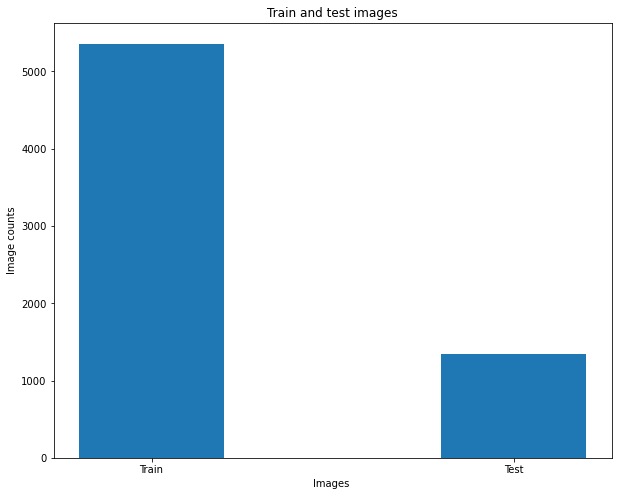

In [3]:
import matplotlib.pyplot as plt

imgs = [len(trainImages), len(testImages)]
labels = ['Train', 'Test']
fig = plt.figure(figsize=(10,8))
plt.bar(labels, imgs, width=0.4)
plt.title('Train and test images')
plt.ylabel('Image counts')
plt.xlabel('Images ')
plt.show()

In above 2 cells we have prepared list of Train and Test data and also we have a plot of total images in both the sets we have around 5000 training images and 1300 test images. here after we will label the images. But we have to note that since we have 67 classes we will label it by image folder name itself which causes the bias i.e. will be more bias towords english laguage. And also we will plot the images categorie wise stating how many images we have in each catagory. Our main task for preprocessing is to copy images from source the test and train folders as we to use slected images from entire dataset.

In [4]:
import pandas as pd
train = []
trainCategories = []
test = []
testCategories = []
for i in trainImages:
    train.append(i.split('/')[-1])
    trainCategories.append(i.split('/')[5])

for j in testImages:
    test.append(j.split('/')[-1])
    testCategories.append(j.split('/')[5])

trainDF = pd.DataFrame({'File': train,
                        'class': trainCategories})

testDF  = pd.DataFrame({'File': test,
                        'Class': testCategories})


print(trainDF.head())
print(testDF.head())    

                          File       class
0       bt_132294gameroom2.jpg    gameroom
1  inside_pool_and_hot_tub.jpg  poolinside
2      bodega_12_11_flickr.jpg  winecellar
3              casino_0512.jpg      casino
4                 living58.jpg  livingroom
                                 File               Class
0                          int474.jpg             kitchen
1  operating_room_31_03_altavista.jpg      operating_room
2  restaurant_kitchen_google_0075.jpg  restaurant_kitchen
3          videoclub_05_14_flickr.jpg          videostore
4            piscine_interieureee.jpg          poolinside


<AxesSubplot:>

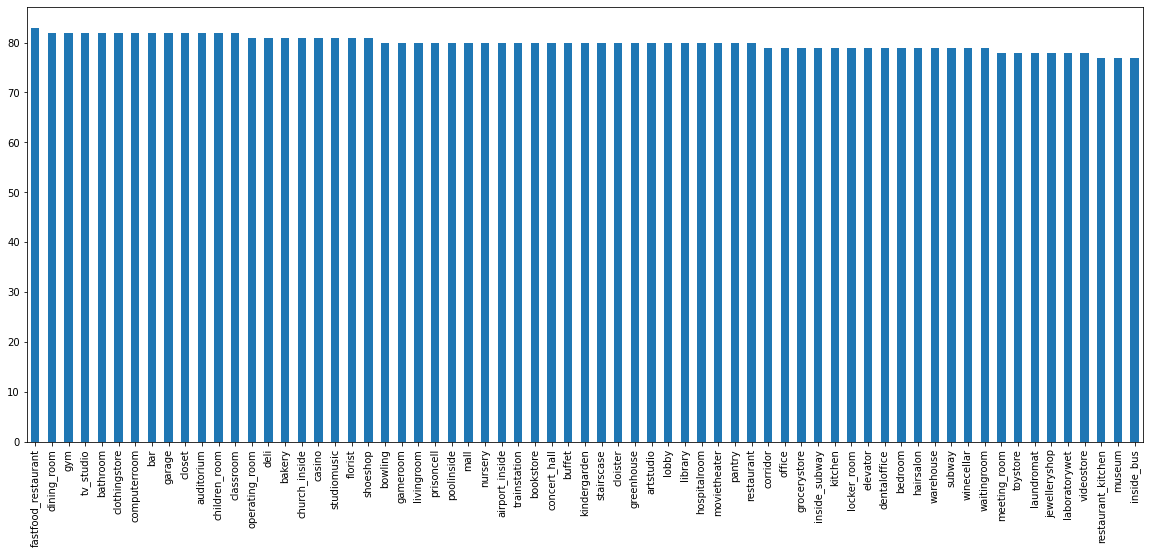

In [48]:

plt.rcParams["figure.figsize"] = [20,8]
trainDF['class'].value_counts().plot(linewidth=4, kind='bar')

<AxesSubplot:>

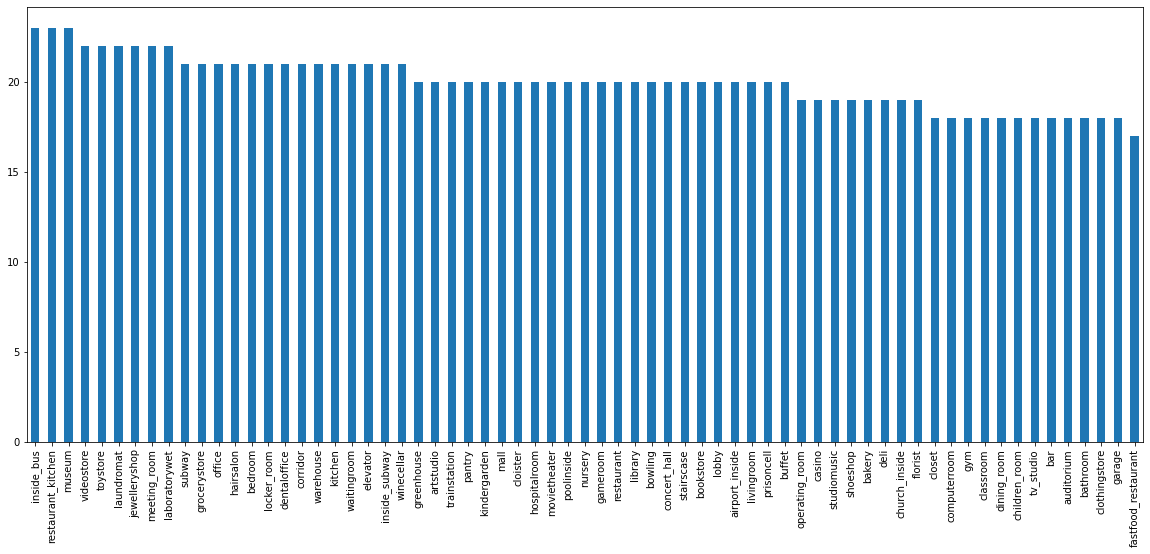

In [27]:
fig = plt.rcParams["figure.figsize"] = [20,8]
testDF['Class'].value_counts().plot(linewidth=4, kind='bar')

Above we have plotted each total images in each category now we will move images to sepearate folder and make our data ready for training.

In [47]:
 import shutil
 dst = '../Datasets/indoorscenes/'
 for file in trainImages:
     shutil.copy(file, os.path.join(dst,'train'))

 for testFile in testImages:
     shutil.copy(testFile, os.path.join(dst,'test'))



Now we are done with all the preprocessing and exploratory analysis required for basic understanding of dataset now onwords we will start training process. We will use ImageGenerator from tensorflow for data augmentation etc. Read tensorflow docs for more information on ImageGenerator.  

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn.model_selection as ms

In [31]:

train, validation = ms.train_test_split(trainDF, 
                                        test_size=0.4, 
                                        random_state=3)
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)
data_dir = '../Datasets/indoorscenes/train'
batch_size = 40
#Instantiate the imageGenerator and set data augmentation options.
train_datagen = ImageDataGenerator(rescale= 1./255,
                                    horizontal_flip= True,
                                    rotation_range=90,
                                    zoom_range=0.45)


train_data = train_datagen.flow_from_dataframe(train,
                                                data_dir,
                                                batch_size = batch_size,
                                                x_col = 'File',
                                                y_col = 'class',
                                                target_size=(200,200),
                                                class_mode='categorical'

                                                )

Found 3216 validated image filenames belonging to 67 classes.


In [32]:
# similarly prepare validation data

validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_data = validation_datagen.flow_from_dataframe(validation,
                                                         data_dir,
                                                         batch_size = 40,
                                                         x_col = 'File',
                                                         y_col= 'class',
                                                         target_size=(200,200),
                                                         class_mode='categorical')


Found 2144 validated image filenames belonging to 67 classes.


In [33]:
steps_per_iter = train.shape[0] // batch_size
validation_steps = validation.shape[0] // batch_size


After completing above process we will be able to define our model structure and train it on the data.
TODO - Design model architecture. and code down here

In [34]:
import tensorflow as tf


In [38]:

def training_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(67, activation='softmax')
    ])

    return model

In [39]:
myModel = training_model()

In [43]:
myModel.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [46]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 512)       5